# Proje Uyeleri ve Görev Dağılımları

Eren Kara -> B211210031  
Proje ödev dokümanında belirtilen 1., 2. ve 3. maddeleri yaptım.  
Aşağıdaki kod dosyasında ise 1. ve 2. maddeleri ben yaptım.  
Yani veri incelenmesi, veri görselleştirilmesi, feature enginnering, normalizasyon, Veri ön işleme kısımları bana aitti.  

Ilyas Aydin -> 


Emre Kara -> 


Vedat ... -> 

# Veri Seti Hakkında

Veri seti kaynak linki: https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset

Veri setinde gym üyelerinin fiziksel özelliklerinin yanında spor yaptığı süre, haftada kaç gün spor yaptığı, ne kadar tecrübeli oldukları, ne kadar su içtikleri gibi bilgiler bulunmaktadır. Bu bilgileri kullanarak amacımız herhangi bir spor salonu üyesinin ne kadar kalori yaktığını bulmak olacak.

# 1. Veri İncelemesi

### 1.1 Kutuphane Ekleme işlemleri

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Veri Setinin Yüklenmesi

In [2]:
df = pd.read_csv("./gym_members_exercise_tracking.csv")

Veri seti 973 veriden oluşmakta.
Veri setinde toplam 15 adet özellik ( column ) bulunmakta.  
Bu bilgileri kullanarak amacımız herhangi bir spor salonu üyesinin ne kadar kalori yaktığını bulmak olacak.

In [3]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


### 1.3 Veri Seti Kontrolleri

In [4]:
df.rename(columns={"Weight (kg)": "Weight"}, inplace=True)
df.rename(columns={"Session_Duration (hours)": "Session_Duration"}, inplace=True)
df.rename(columns={"Height (m)": "Height"}, inplace=True)
df.rename(columns={"Water_Intake (liters)": "Water_Intake"}, inplace=True)
df.rename(columns={"Workout_Frequency (days/week)": "Workout_Frequency"}, inplace=True)

In [5]:
df.head()

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [6]:
df.isnull().sum()

Age                  0
Gender               0
Weight               0
Height               0
Max_BPM              0
Avg_BPM              0
Resting_BPM          0
Session_Duration     0
Calories_Burned      0
Workout_Type         0
Fat_Percentage       0
Water_Intake         0
Workout_Frequency    0
Experience_Level     0
BMI                  0
dtype: int64

In [7]:
# df.dtypes # Bu sadece data type'ları veriyor
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                973 non-null    int64  
 1   Gender             973 non-null    object 
 2   Weight             973 non-null    float64
 3   Height             973 non-null    float64
 4   Max_BPM            973 non-null    int64  
 5   Avg_BPM            973 non-null    int64  
 6   Resting_BPM        973 non-null    int64  
 7   Session_Duration   973 non-null    float64
 8   Calories_Burned    973 non-null    float64
 9   Workout_Type       973 non-null    object 
 10  Fat_Percentage     973 non-null    float64
 11  Water_Intake       973 non-null    float64
 12  Workout_Frequency  973 non-null    int64  
 13  Experience_Level   973 non-null    int64  
 14  BMI                973 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 114.2+ KB


### 1.3 Özellik Analizleri

In [8]:
df.describe()

,Age,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [9]:
# Kaç farklı yaş grubudan insan katılmış
df["Age"].unique()

array([56, 46, 32, 25, 38, 36, 40, 28, 41, 53, 57, 20, 39, 19, 47, 55, 50,
       29, 42, 44, 59, 45, 33, 54, 24, 26, 35, 21, 31, 43, 37, 52, 34, 23,
       51, 27, 48, 58, 18, 22, 30, 49], dtype=int64)

In [10]:
# Kaç farklı tip workout type var.
df["Workout_Type"].unique()

array(['Yoga', 'HIIT', 'Cardio', 'Strength'], dtype=object)

In [11]:
# # Kaç farklı tip deneyim kategorilenmiş.
df["Experience_Level"].unique()

array([3, 2, 1], dtype=int64)

In [12]:
# Gender dağılımını buldum. Nerdeyse eşit
df[["Gender","Age"]].groupby("Gender").size().reset_index(name='Count')

,Gender,Count
0,Female,462
1,Male,511


In [13]:
# Ne kadar tecrübeli insan var. Dağılımını buldum. Calorie yakımında bu işi ne kadar süredir yapıyorsun ve ne kadar yetkinsin 
# oldukça önemlidir. Büyük bir korelasyon vardır diye düşünüyorum.
df[["Experience_Level","Age"]].groupby("Experience_Level").size().reset_index(name='Count')

,Experience_Level,Count
0,1,376
1,2,406
2,3,191


In [14]:
df[["Workout_Type","Age"]].groupby("Workout_Type").size().reset_index(name='Count')

,Workout_Type,Count
0,Cardio,255
1,HIIT,221
2,Strength,258
3,Yoga,239


<Axes: xlabel='Workout_Type', ylabel='count'>

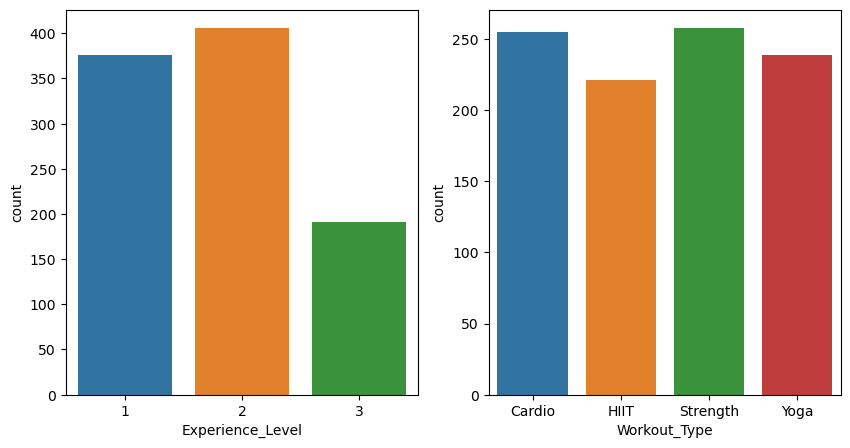

In [15]:
# Bir de görsel olarak görelim.
fig , ax =plt.subplots(1,2,figsize=(10,5))
sns.countplot(x="Experience_Level",data=df.sort_values("Experience_Level"), ax=ax[0])
sns.countplot(x="Workout_Type",data=df.sort_values("Workout_Type"), ax=ax[1])

In [16]:
Gendera_Gore_Workout_Type_Dagilimi = df[["Gender","Workout_Type"]].groupby(["Gender","Workout_Type"]).size().reset_index(name='Count')
Gendera_Gore_Workout_Type_Dagilimi

,Gender,Workout_Type,Count
0,Female,Cardio,126
1,Female,HIIT,107
2,Female,Strength,123
3,Female,Yoga,106
4,Male,Cardio,129
5,Male,HIIT,114
6,Male,Strength,135
7,Male,Yoga,133


<Axes: xlabel='Workout_Type', ylabel='Count'>

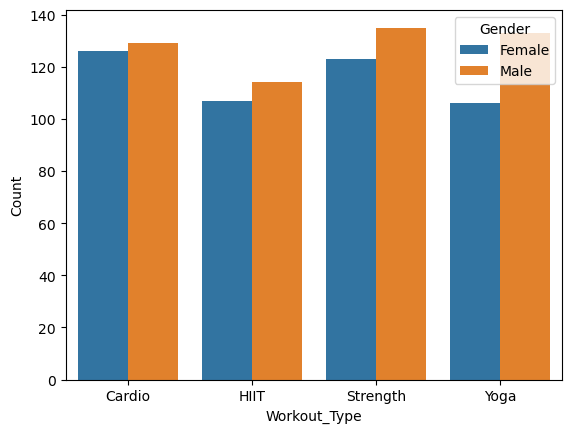

In [17]:
# kadın ve erkekler hangi workout_type'ları yapıyormuş oranlar ne
sns.barplot(data=Gendera_Gore_Workout_Type_Dagilimi, x='Workout_Type', y='Count', hue='Gender')

<Axes: xlabel='Weight', ylabel='Height'>

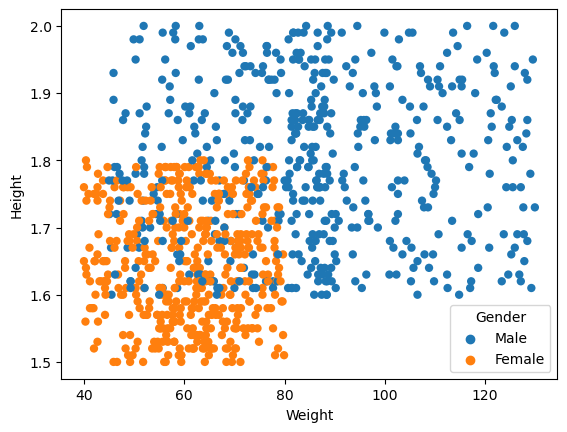

In [18]:
# boy, kilo ve cinsiyete göre bir bakmak istedim. Herhangi bir ayrkırı değer var mı. 
# 1.80 olup 40 kilo olan kadın da var. 2 metre olup 50 kilo olan erkek de.
sns.scatterplot(x="Weight", y="Height",
                hue="Gender", linewidth=0,
                data=df)

### 1.4 Özelliklerin Arasındaki Korelasyonlar 

<Axes: xlabel='Workout_Type', ylabel='Calories_Burned'>

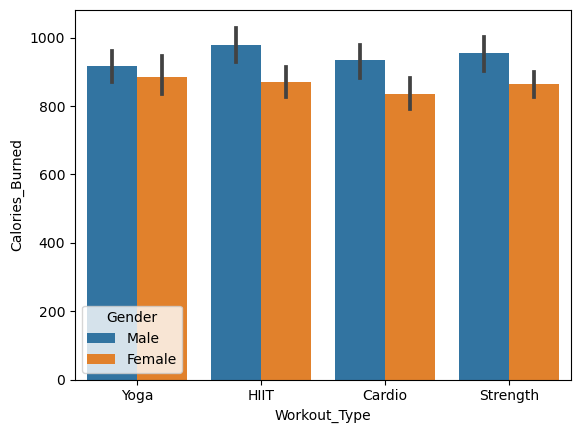

In [19]:
# Hangi tip egzersiz daha çok kalori yaktırıyor diye bakmak istedim.
sns.barplot(data=df, x='Workout_Type', y='Calories_Burned', hue='Gender')

<Axes: xlabel='Calories_Burned', ylabel='Count'>

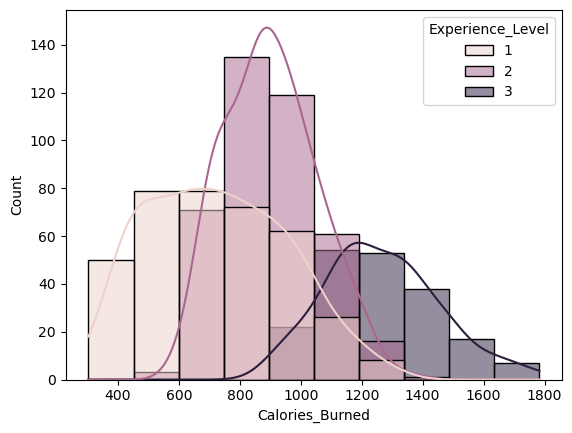

In [20]:
# Ulaşmak istediğimiz kalori yakımının ne kadar dengeli olduğunu görmek istedim. Veriler nasıl dağılmış.
sns.histplot(data=df, x="Calories_Burned", hue="Experience_Level", bins=10, kde=True)

<Axes: xlabel='Calories_Burned', ylabel='Count'>

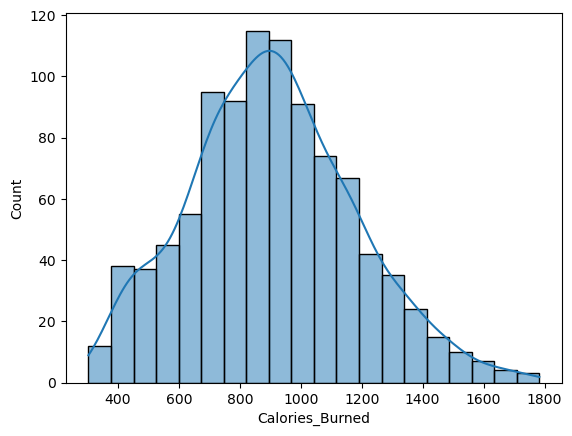

In [21]:
# Üsttekinin daha basit bir gösterimi
sns.histplot(data=df, x="Calories_Burned",  bins=20, kde=True)

Text(0, 0.5, 'Calories_Burned')

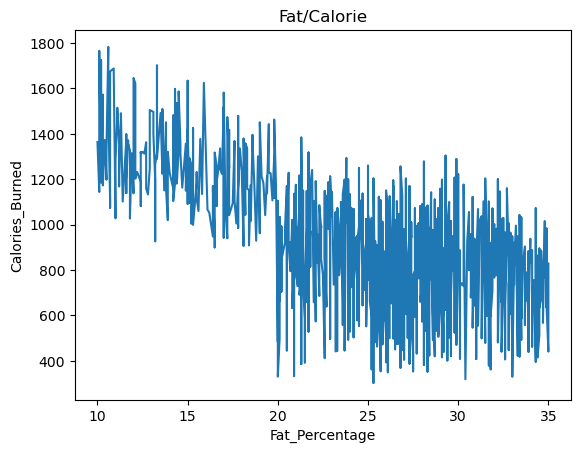

In [22]:
# Yağ oranı ile yakılan kalori arasında bağ var mı diye baktım. Burada daha az yağ oranına sahip olanların genel olarak
# daha çok kalori yaktıkları ortaya çıktı.
df_temp = df[["Fat_Percentage","Calories_Burned"]].sort_values(by="Fat_Percentage")
plt.plot(df_temp["Fat_Percentage"], df_temp["Calories_Burned"])    
plt.title("Fat/Calorie")
plt.xlabel("Fat_Percentage")
plt.ylabel("Calories_Burned")

Text(0, 0.5, 'Calories_Burned')

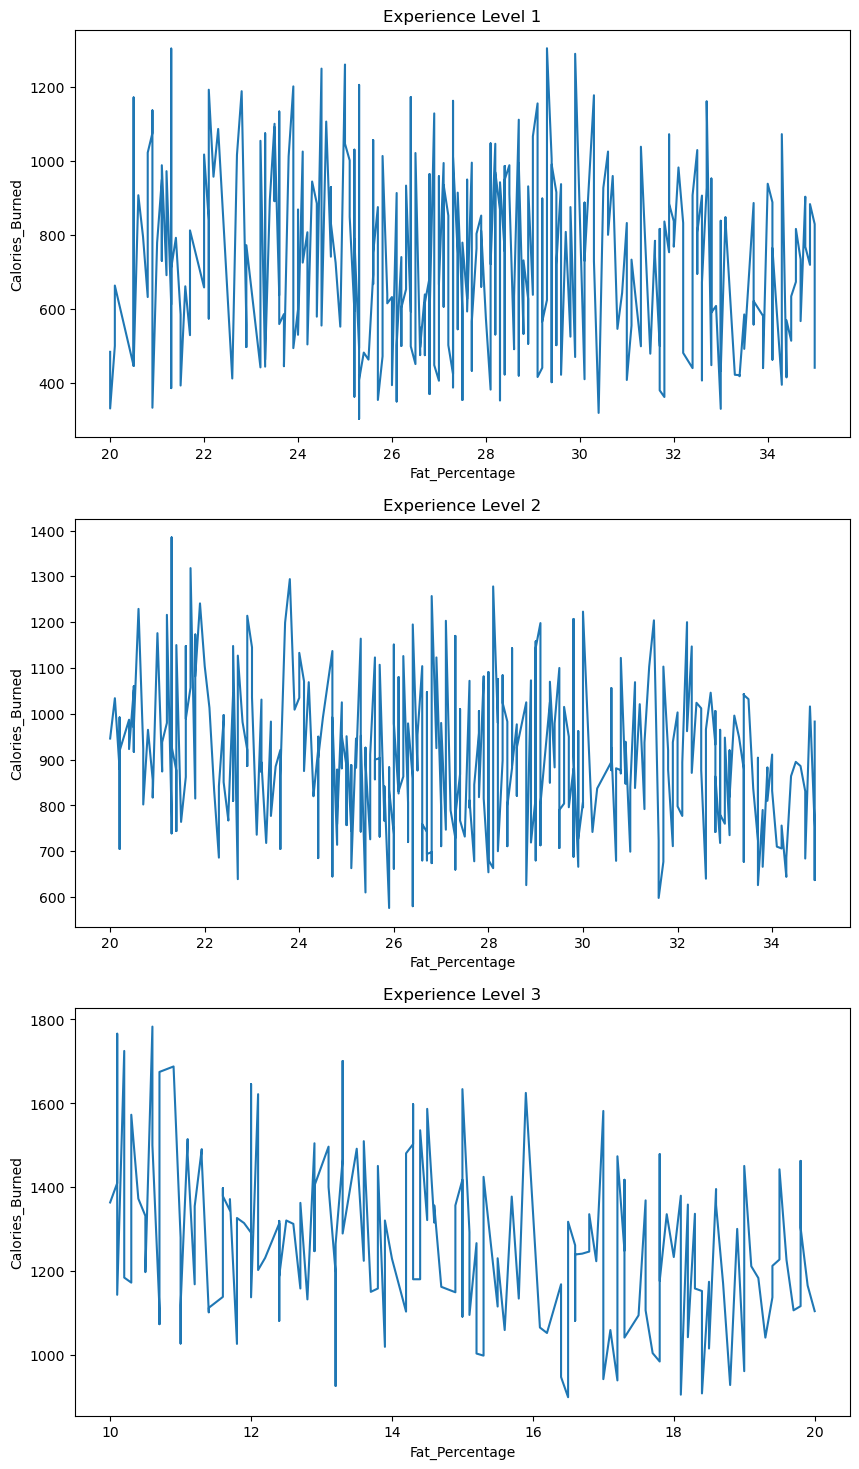

In [23]:
# Yağ oranının kalori yakılmasındaki etkisine baktım. Yani çok kilolu bireyler daha mı çok kalori yakarlar diye inceledim
# Ayrıca yağ oranlarının ve kalori yakımının tecrübe ile olan ilişkisini de grafikleri tecrübeye göre 3 kere çizdirdiğim
# kolayca farkedebildim.
df_temp = df[["Experience_Level","Fat_Percentage","Calories_Burned"]]
df_temp_ex_1 = df_temp.where(df_temp["Experience_Level"]==1).sort_values(by="Fat_Percentage").dropna()
df_temp_ex_2 = df_temp.where(df_temp["Experience_Level"]==2).sort_values(by="Fat_Percentage").dropna()
df_temp_ex_3 = df_temp.where(df_temp["Experience_Level"]==3).sort_values(by="Fat_Percentage").dropna()

fig , ax =plt.subplots(3,1,figsize=(10,18))

ax[0].plot(df_temp_ex_1["Fat_Percentage"], df_temp_ex_1["Calories_Burned"])  
ax[0].set_title("Experience Level 1")
ax[0].set_xlabel("Fat_Percentage")
ax[0].set_ylabel("Calories_Burned")

ax[1].plot(df_temp_ex_2["Fat_Percentage"], df_temp_ex_2["Calories_Burned"])
ax[1].set_title("Experience Level 2")
ax[1].set_xlabel("Fat_Percentage")
ax[1].set_ylabel("Calories_Burned")

ax[2].plot(df_temp_ex_3["Fat_Percentage"], df_temp_ex_3["Calories_Burned"])
ax[2].set_title("Experience Level 3")
ax[2].set_xlabel("Fat_Percentage")
ax[2].set_ylabel("Calories_Burned")


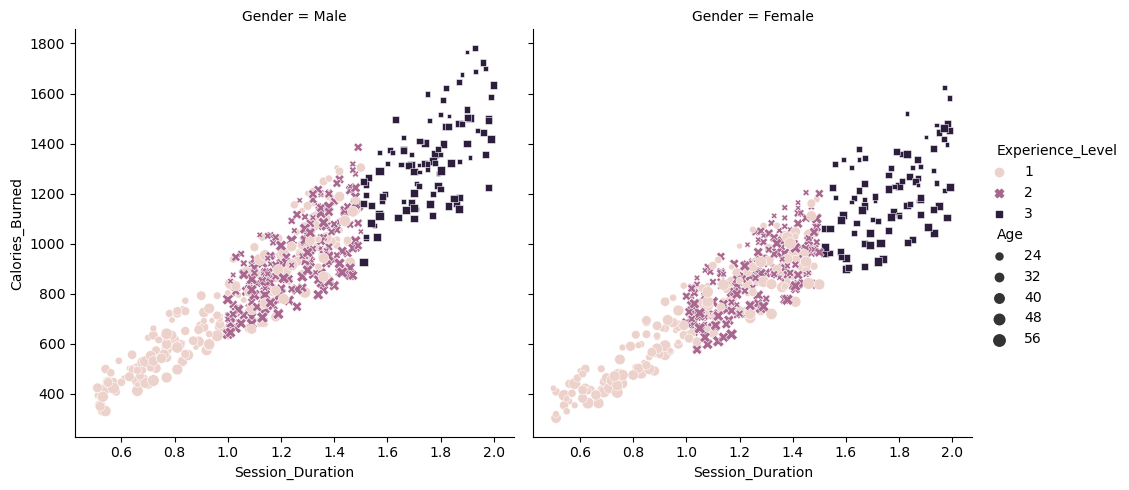

In [24]:
# harcanan zamanın kaloriye etkisin gösterdim, bunu gösterirken de cinsiyete göre ayırdım.
# Ayrıca renklerde tecrübe seviyesini kullandım. Boyutlarda da yaşları kullandım.
sns.relplot(
    data=df,
    x="Session_Duration", y="Calories_Burned", col="Gender",
    hue="Experience_Level", style="Experience_Level", size="Age",col_wrap=2
)

Text(0.5, 1.0, 'AVG BPM/Resting BPM')

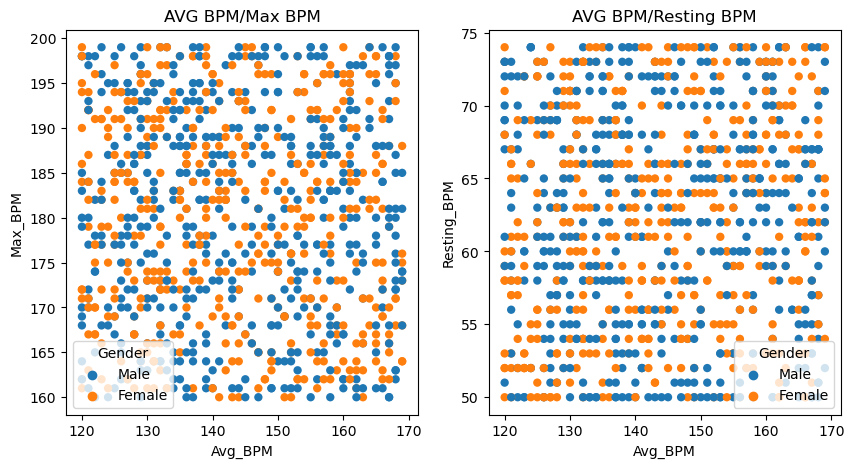

In [25]:
# BPM'ler arası bir ortaklık, bir... bir şey arıyorum. 
fig , ax =plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(x="Avg_BPM", y="Max_BPM",
                hue="Gender", linewidth=0,
                data=df, ax=ax[0])
ax[0].set_title("AVG BPM/Max BPM")


sns.scatterplot(x="Avg_BPM", y="Resting_BPM",
                hue="Gender", linewidth=0,
                data=df, ax=ax[1])
ax[1].set_title("AVG BPM/Resting BPM")


<Axes: xlabel='Resting_BPM', ylabel='Max_BPM'>

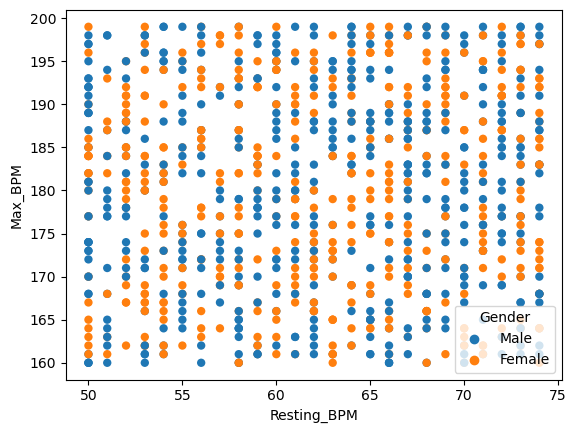

In [26]:
# en düşük ve en yüksek arasında bir orantı var mı diye baktım.
sns.scatterplot(x="Resting_BPM", y="Max_BPM",
                hue="Gender", linewidth=0,
                data=df)

Text(0.5, 1.0, 'Age/Caliories Burned')

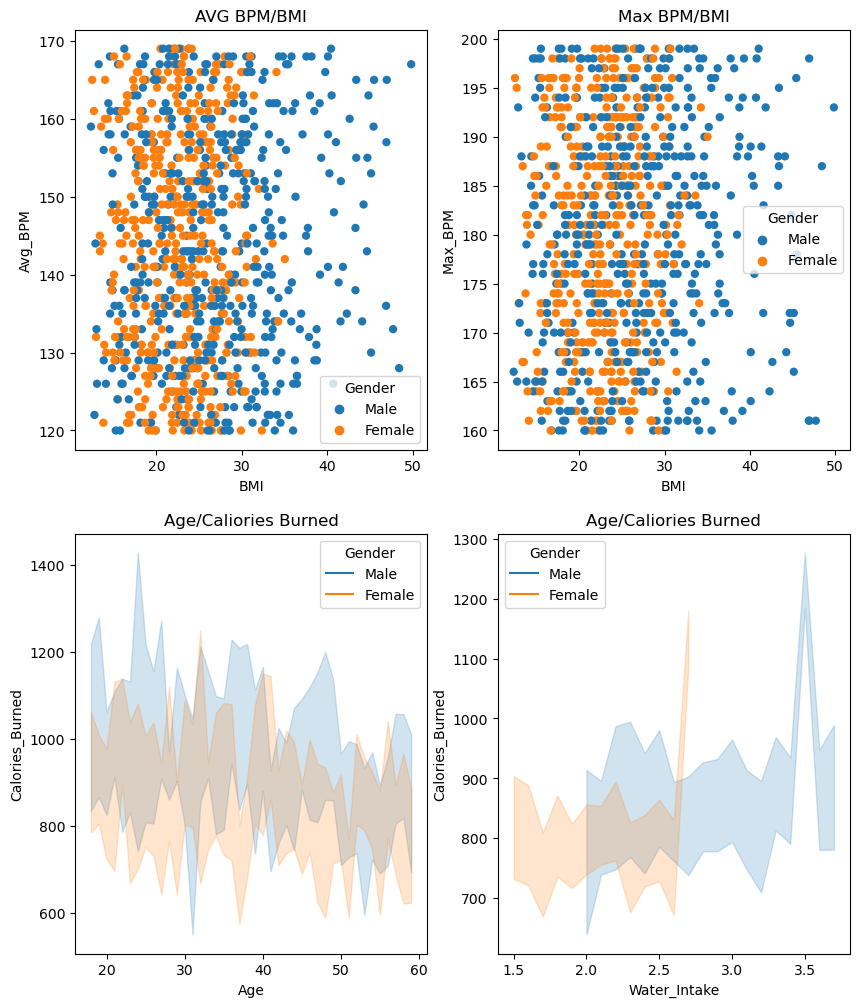

In [27]:
# Bir çok farklı özelliğin birbiri ile nasıl bir ilişki içerisinde olduğunu görmek için veriyi inceledim.
# Herhangi bir korelasyon yakalanabilir mi?
fig , ax =plt.subplots(2,2,figsize=(10,12))
sns.scatterplot(x="BMI", y="Avg_BPM",
                hue="Gender", linewidth=0,
                data=df, ax= ax[0][0])
ax[0][0].set_title("AVG BPM/BMI")

sns.scatterplot(x="BMI", y="Max_BPM",
                hue="Gender", linewidth=0,
                data=df, ax= ax[0][1])
ax[0][1].set_title("Max BPM/BMI")



sns.lineplot(x="Age", y="Calories_Burned",
                hue="Gender", linewidth=0,
                data=df, ax= ax[1][0])
ax[1][0].set_title("Age/Caliories Burned")

sns.lineplot(x="Water_Intake", y="Calories_Burned",
                hue="Gender", linewidth=0,
                data=df, ax= ax[1][1])
ax[1][1].set_title("Age/Caliories Burned")

<Axes: >

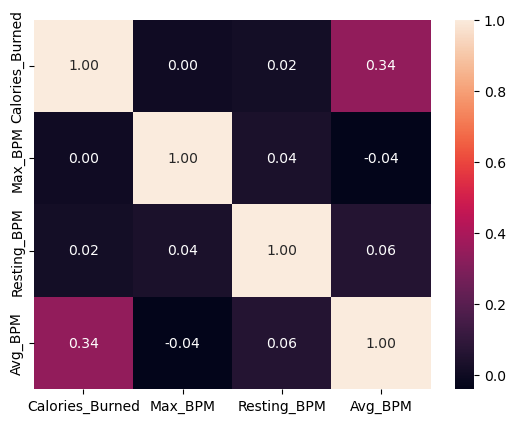

In [28]:
# BPM'lerden herhangi biri diğer 3'ünü karşılayabilir mi diye bakmak istedim.
sns.heatmap(df[["Calories_Burned","Max_BPM","Resting_BPM","Avg_BPM"]].corr(),annot=True, fmt=".2f")

<Axes: >

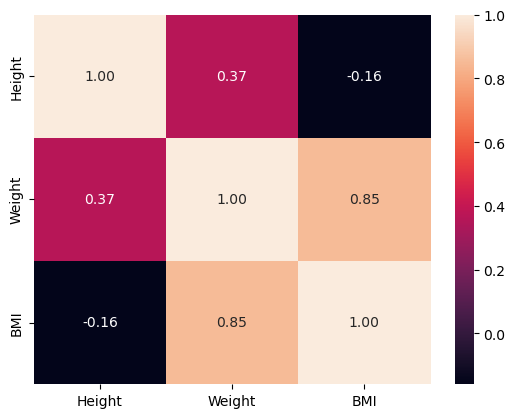

In [29]:
# BMI zaten boy ve kilodan hesaplandığından dolayı BMI kullanıp boy ve kiloyu çıkartmak daha mı mantıklı olur diye korelasyona baktım
sns.heatmap(df[["Height","Weight","BMI"]].corr(),annot=True, fmt=".2f")

<Axes: >

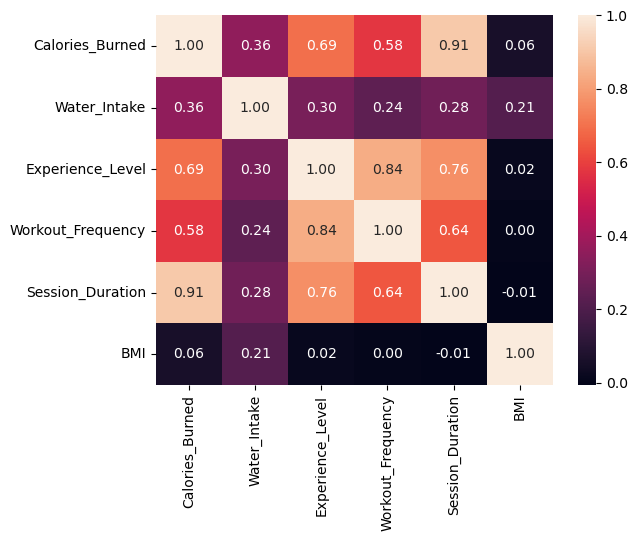

In [30]:
# Kalori yakılması'nın hangi özellikler ile daha korale gittiğini görmek istedim
# Ayrıca su alımının hangi özellikler ile korale gittiğini anlamak da önemli böylece veri kümemizdeki insanların davranışlarını analiz edebilriiz.
sns.heatmap(df[["Calories_Burned","Water_Intake","Experience_Level","Workout_Frequency","Session_Duration","BMI"]].corr(),annot=True, fmt=".2f")

<Axes: >

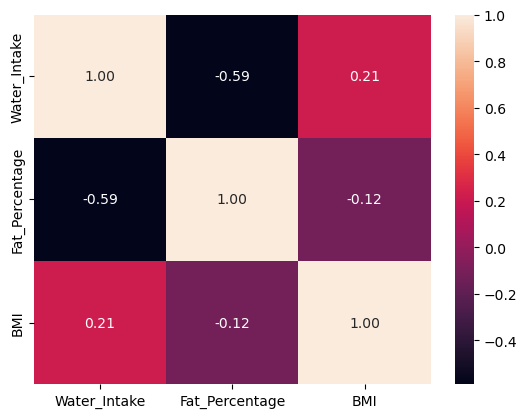

In [31]:
# Yağ ile sanki su içme arasına ters bir lineer orantı var gibi ama...
sns.heatmap(df[["Water_Intake","Fat_Percentage","BMI"]].corr(),annot=True, fmt=".2f")

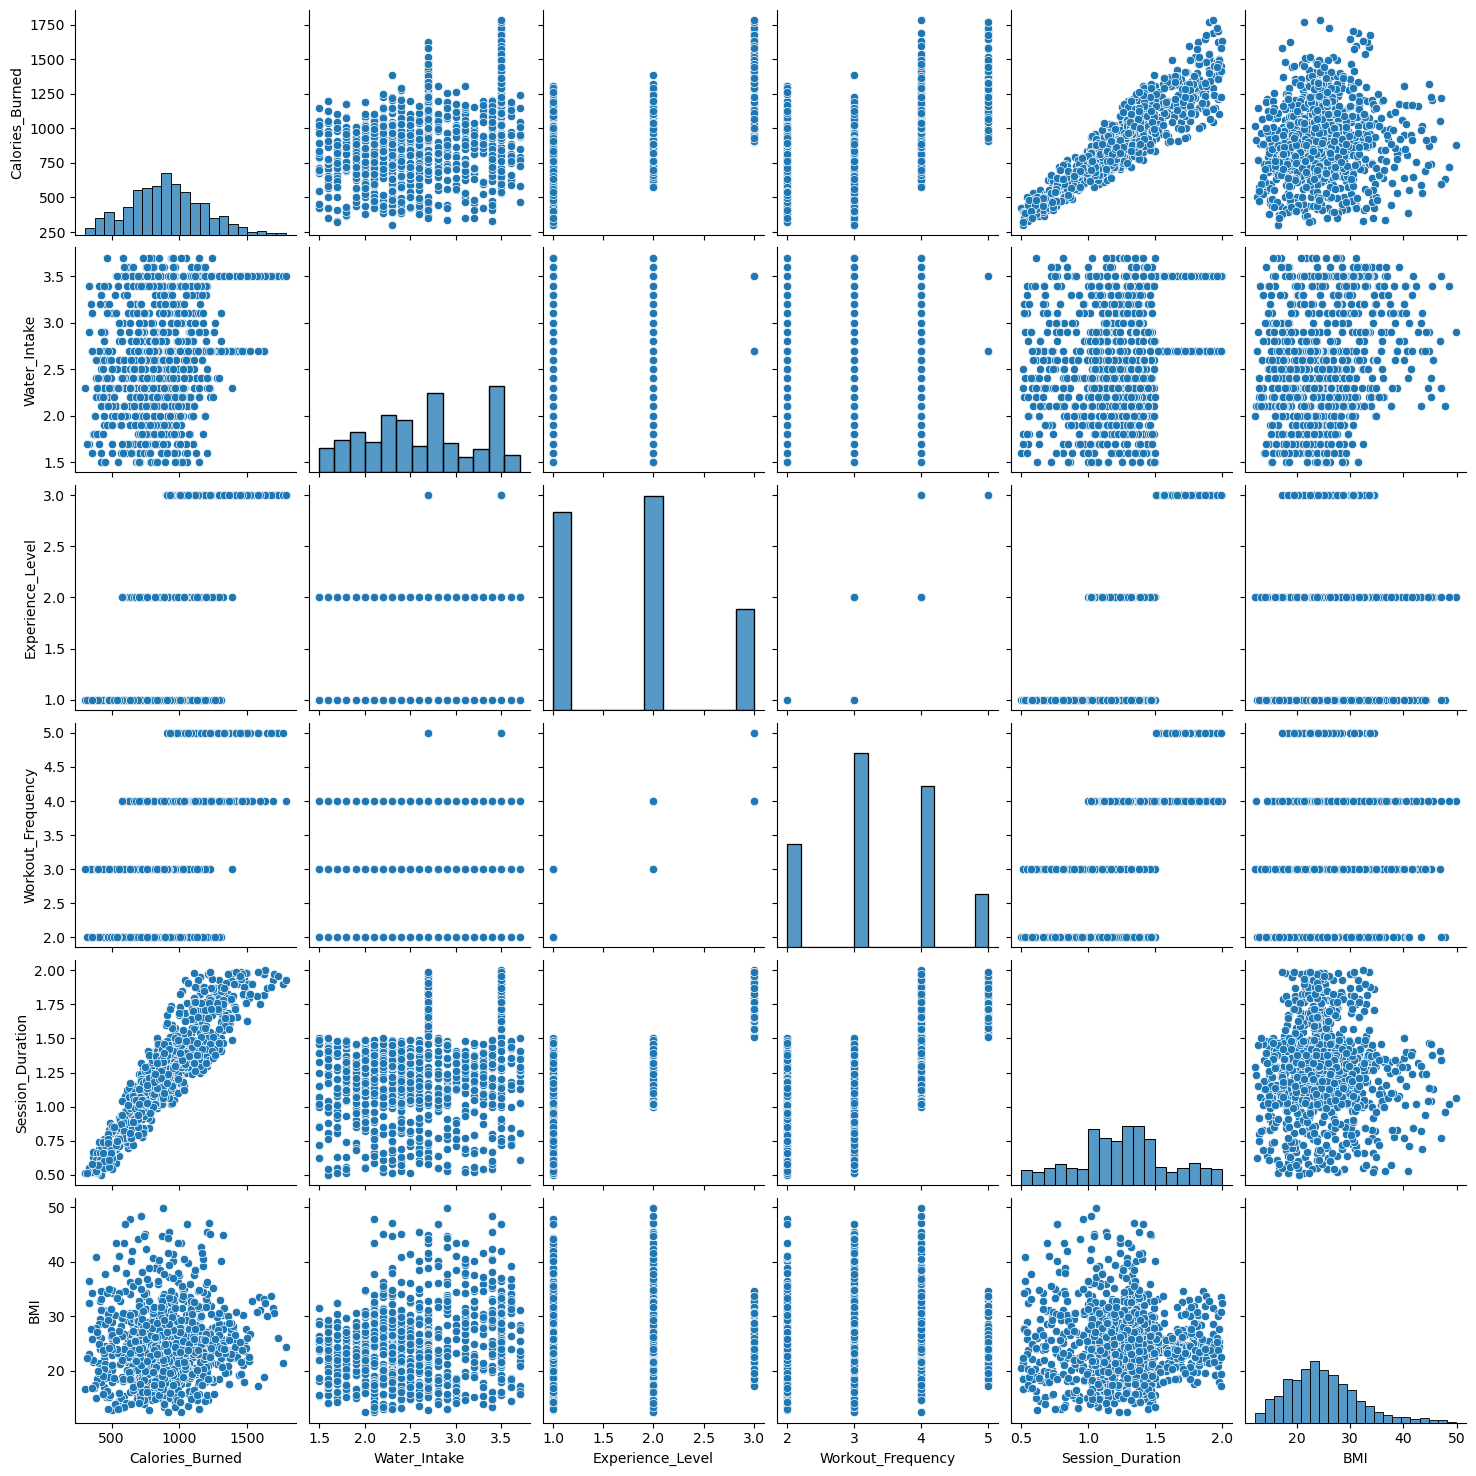

In [32]:
# Hazır böyle bir yöntem varmış belki gözümüze bir şey çarpar diye çizdirdim.
sns.pairplot(data=df[["Calories_Burned","Water_Intake","Experience_Level","Workout_Frequency","Session_Duration","BMI"]])

# 2. Veri Ön İşleme

### 2.1 Normalization veya Standardization

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler_normalizer = MinMaxScaler()
scaler_standardizer = StandardScaler()

In [34]:
# PCA ve Factor analysis kullanılacağı için verileri standardize edeceğiz
# Aşağıda gerektiği yerlerde data frame'in istediğim kısımlarını standardize ettim.
# Ayrıca standardize edilmesi genel olarak tavsiye ediliyor.

In [35]:
columns = [col for col in df.columns if not (col == "Gender" or col == "Workout_Type" or col == "Calories_Burned")]

df_temp = df[columns]
df_temp = scaler_standardizer.fit_transform(df_temp)

In [36]:
df_standard = pd.DataFrame(df_temp, columns=columns)
df_standard = pd.concat([df_standard,df[["Gender","Workout_Type","Calories_Burned"]]],axis=1)

In [37]:
df_standard

,Age,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,BMI,Gender,Workout_Type,Calories_Burned
0,1.422343,0.681493,-0.098545,0.010081,0.922970,-0.303555,1.264598,-1.978321,1.455967,0.743295,1.609784,0.794278,Male,Yoga,1313.0
1,0.600965,0.049316,-1.508604,-0.076726,0.504494,0.515749,0.127098,1.426301,-0.877898,0.743295,0.257176,1.064652,Female,HIIT,883.0
2,-0.548964,-0.271491,-0.490228,-1.118414,-1.518142,-1.122858,-0.427068,1.346380,-0.544488,0.743295,0.257176,-0.030361,Female,Cardio,677.0
3,-1.123928,-0.974433,-0.176881,0.878155,1.411193,-0.849757,-1.943735,0.611110,-0.877898,-0.352502,-1.095432,-0.976669,Male,Strength,532.0
4,-0.056137,-1.309393,0.528148,0.704540,0.992716,0.788850,-1.797902,0.675047,0.289035,-0.352502,-1.095432,-1.580503,Male,Strength,556.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,-1.206066,0.624880,0.136465,0.617733,0.992716,0.652299,0.914598,-2.393908,1.455967,0.743295,1.609784,0.579482,Male,Strength,1364.0
969,-1.123928,-0.342257,-0.881911,0.357311,1.550685,-0.849757,0.360432,0.003713,0.622444,-1.448299,-1.095432,0.116842,Male,Strength,1260.0
970,1.668756,-0.634756,0.293138,1.225384,-1.657634,-1.259409,1.352098,-0.987304,0.122330,1.839092,1.609784,-0.812942,Female,Cardio,929.0
971,-0.548964,2.478951,0.841495,1.572614,0.155764,-0.030454,-0.456235,0.515205,-0.877898,-0.352502,0.257176,1.926843,Male,HIIT,883.0


In [38]:
columns = [col for col in df_standard.columns if col != "Calories_Burned"]

# Şuanda bir ayrım yaptığımdan satır bazlı işlem yapmamalıyız. Eğer satır bazlı işlem yaparsak X_df ile Y_df birbiri ile ötrüşmez
# Bu yüzden en son X ve Y ayrımı yapmak daha mantıklıymış. Tecrübe oldu!
X_df = df_standard[columns]

Y_df = df_standard[["Calories_Burned"]]

In [39]:
# özelliklerimiz
X_df

,Age,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,BMI,Gender,Workout_Type
0,1.422343,0.681493,-0.098545,0.010081,0.922970,-0.303555,1.264598,-1.978321,1.455967,0.743295,1.609784,0.794278,Male,Yoga
1,0.600965,0.049316,-1.508604,-0.076726,0.504494,0.515749,0.127098,1.426301,-0.877898,0.743295,0.257176,1.064652,Female,HIIT
2,-0.548964,-0.271491,-0.490228,-1.118414,-1.518142,-1.122858,-0.427068,1.346380,-0.544488,0.743295,0.257176,-0.030361,Female,Cardio
3,-1.123928,-0.974433,-0.176881,0.878155,1.411193,-0.849757,-1.943735,0.611110,-0.877898,-0.352502,-1.095432,-0.976669,Male,Strength
4,-0.056137,-1.309393,0.528148,0.704540,0.992716,0.788850,-1.797902,0.675047,0.289035,-0.352502,-1.095432,-1.580503,Male,Strength
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,-1.206066,0.624880,0.136465,0.617733,0.992716,0.652299,0.914598,-2.393908,1.455967,0.743295,1.609784,0.579482,Male,Strength
969,-1.123928,-0.342257,-0.881911,0.357311,1.550685,-0.849757,0.360432,0.003713,0.622444,-1.448299,-1.095432,0.116842,Male,Strength
970,1.668756,-0.634756,0.293138,1.225384,-1.657634,-1.259409,1.352098,-0.987304,0.122330,1.839092,1.609784,-0.812942,Female,Cardio
971,-0.548964,2.478951,0.841495,1.572614,0.155764,-0.030454,-0.456235,0.515205,-0.877898,-0.352502,0.257176,1.926843,Male,HIIT


In [40]:
# tahmin etmek istediğimiz değer
Y_df

,Calories_Burned
0,1313.0
1,883.0
2,677.0
3,532.0
4,556.0
...,...
968,1364.0
969,1260.0
970,929.0
971,883.0


### 2.2 Encoding

In [41]:
# Kategorik verileri sayisallaştırma

In [42]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
ohe_gender  = preprocessing.OneHotEncoder()
ohe_workout_type  = preprocessing.OneHotEncoder()

In [43]:
X_df.head()

,Age,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,BMI,Gender,Workout_Type
0,1.422343,0.681493,-0.098545,0.010081,0.922970,-0.303555,1.264598,-1.978321,1.455967,0.743295,1.609784,0.794278,Male,Yoga
1,0.600965,0.049316,-1.508604,-0.076726,0.504494,0.515749,0.127098,1.426301,-0.877898,0.743295,0.257176,1.064652,Female,HIIT
2,-0.548964,-0.271491,-0.490228,-1.118414,-1.518142,-1.122858,-0.427068,1.346380,-0.544488,0.743295,0.257176,-0.030361,Female,Cardio
3,-1.123928,-0.974433,-0.176881,0.878155,1.411193,-0.849757,-1.943735,0.611110,-0.877898,-0.352502,-1.095432,-0.976669,Male,Strength
4,-0.056137,-1.309393,0.528148,0.704540,0.992716,0.788850,-1.797902,0.675047,0.289035,-0.352502,-1.095432,-1.580503,Male,Strength


In [44]:
# Workout type ve Gender'da one hot encoding kullanmaya karar verdik
# Çünkü yukarıdaki veri incelemelerimiz sonunda workout_type'lar ile kalori yakımı arasında üstünlük ilişkisine
# dayalı bir korelasyon bulamadık.
# Gender zaten oen hot encoding ile yapılacak. 

In [45]:
X_df["Gender"] = ohe_gender.fit_transform(X_df[["Gender"]]).toarray()

C:\Users\Eren\AppData\Local\Temp\ipykernel_17716\1869138924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df["Gender"] = ohe_gender.fit_transform(X_df[["Gender"]]).toarray()


In [46]:
# df = pd.get_dummies(df, columns= ["Workout_Type"])
deneme = ohe_workout_type.fit_transform(X_df[["Workout_Type"]]).toarray()
column_name_ohe = ["Workout_Type_Cardio","Workout_Type_HIIT","Workout_Type_Strength","Workout_Type_Yoga"]
deneme = pd.DataFrame(deneme, columns=column_name_ohe)

In [47]:
X_df = pd.concat([X_df,deneme],axis=1)
X_df.drop(["Workout_Type"],axis=1,inplace=True)

In [48]:
X_df.head()

,Age,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,BMI,Gender,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,1.422343,0.681493,-0.098545,0.010081,0.922970,-0.303555,1.264598,-1.978321,1.455967,0.743295,1.609784,0.794278,0.0,0.0,0.0,0.0,1.0
1,0.600965,0.049316,-1.508604,-0.076726,0.504494,0.515749,0.127098,1.426301,-0.877898,0.743295,0.257176,1.064652,1.0,0.0,1.0,0.0,0.0
2,-0.548964,-0.271491,-0.490228,-1.118414,-1.518142,-1.122858,-0.427068,1.346380,-0.544488,0.743295,0.257176,-0.030361,1.0,1.0,0.0,0.0,0.0
3,-1.123928,-0.974433,-0.176881,0.878155,1.411193,-0.849757,-1.943735,0.611110,-0.877898,-0.352502,-1.095432,-0.976669,0.0,0.0,0.0,1.0,0.0
4,-0.056137,-1.309393,0.528148,0.704540,0.992716,0.788850,-1.797902,0.675047,0.289035,-0.352502,-1.095432,-1.580503,0.0,0.0,0.0,1.0,0.0


### 2.3 Feature Engineering 

##### 2.3.1 Bazı özellikleri silmek

In [49]:
# Veriyi inceledikten sonra weight ve height yerine BMI kullanmanın mantıklı olacağını düşündük
# BMI zaten varlığı itibari ile boy ve kilo'nun farklı bir temsili. Yani zaten özellik çıkartılmış hali.

In [50]:
X_df.drop(["Weight","Height"],axis=1,inplace=True)

In [51]:
X_df.head()

,Age,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,BMI,Gender,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,1.422343,0.010081,0.922970,-0.303555,1.264598,-1.978321,1.455967,0.743295,1.609784,0.794278,0.0,0.0,0.0,0.0,1.0
1,0.600965,-0.076726,0.504494,0.515749,0.127098,1.426301,-0.877898,0.743295,0.257176,1.064652,1.0,0.0,1.0,0.0,0.0
2,-0.548964,-1.118414,-1.518142,-1.122858,-0.427068,1.346380,-0.544488,0.743295,0.257176,-0.030361,1.0,1.0,0.0,0.0,0.0
3,-1.123928,0.878155,1.411193,-0.849757,-1.943735,0.611110,-0.877898,-0.352502,-1.095432,-0.976669,0.0,0.0,0.0,1.0,0.0
4,-0.056137,0.704540,0.992716,0.788850,-1.797902,0.675047,0.289035,-0.352502,-1.095432,-1.580503,0.0,0.0,0.0,1.0,0.0


##### 2.3.2 PCA ( Kullanıldı etkin sonuç verdi )

PCA'yı "Experience_Level"  "Workout_Frequency"  "Session_Duration" özelliklerine uygulamaya karar verdim.  
Bu özellikler birbirleri ile yüksek korelasyon içerisindeydiler.  
Yani daha az özellik kullanarak bu özellikleri temsil etmek mümkün demek oluyor bu.

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

In [53]:
X_df_pca = X_df[["Workout_Frequency","Experience_Level","Session_Duration"]]
X_df_pca_arr = pca.fit_transform(X_df_pca.values)

In [54]:
X_df_pca = pd.DataFrame(X_df_pca_arr,columns=["Professionality"])

In [55]:
scaler_standardizer = StandardScaler()
X_df_pca_standard = scaler_standardizer.fit_transform(X_df_pca)
X_df_pca = pd.DataFrame(X_df_pca_standard, columns=["Professionality"])
X_df_pca

,Professionality
0,1.326715
1,0.412527
2,0.218390
3,-1.226601
4,-1.175513
...,...
968,1.204102
969,-0.817371
970,1.755340
971,-0.189800


In [56]:
X_df = X_df.drop(["Workout_Frequency","Experience_Level","Session_Duration"],axis=1)
X_df = pd.concat([X_df,X_df_pca],axis=1)
X_df

,Age,Max_BPM,Avg_BPM,Resting_BPM,Fat_Percentage,Water_Intake,BMI,Gender,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Professionality
0,1.422343,0.010081,0.922970,-0.303555,-1.978321,1.455967,0.794278,0.0,0.0,0.0,0.0,1.0,1.326715
1,0.600965,-0.076726,0.504494,0.515749,1.426301,-0.877898,1.064652,1.0,0.0,1.0,0.0,0.0,0.412527
2,-0.548964,-1.118414,-1.518142,-1.122858,1.346380,-0.544488,-0.030361,1.0,1.0,0.0,0.0,0.0,0.218390
3,-1.123928,0.878155,1.411193,-0.849757,0.611110,-0.877898,-0.976669,0.0,0.0,0.0,1.0,0.0,-1.226601
4,-0.056137,0.704540,0.992716,0.788850,0.675047,0.289035,-1.580503,0.0,0.0,0.0,1.0,0.0,-1.175513
...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,-1.206066,0.617733,0.992716,0.652299,-2.393908,1.455967,0.579482,0.0,0.0,0.0,1.0,0.0,1.204102
969,-1.123928,0.357311,1.550685,-0.849757,0.003713,0.622444,0.116842,0.0,0.0,0.0,1.0,0.0,-0.817371
970,1.668756,1.225384,-1.657634,-1.259409,-0.987304,0.122330,-0.812942,1.0,1.0,0.0,0.0,0.0,1.755340
971,-0.548964,1.572614,0.155764,-0.030454,0.515205,-0.877898,1.926843,0.0,0.0,1.0,0.0,0.0,-0.189800


In [57]:
# Bence iyi bir oran elde ettim.
print(f"Açıklanan Varyans Oranı: {pca.explained_variance_ratio_[0]}")

Açıklanan Varyans Oranı: 0.8333631612886794


##### 2.3.3 Factor Analysis ( Kullanmadım test ettim kötü sonuç verdi ) 

Faktör analizi 3 tane BPM değerine uygulamaya karar verdim.  
Bu 3 adet özellik arkasında ortak 1 tane özellik barındırıyor gibi çünkü.  

In [58]:
from sklearn.decomposition import FactorAnalysis

In [59]:
X_df_fa = X_df
X_df_fa

,Age,Max_BPM,Avg_BPM,Resting_BPM,Fat_Percentage,Water_Intake,BMI,Gender,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Professionality
0,1.422343,0.010081,0.922970,-0.303555,-1.978321,1.455967,0.794278,0.0,0.0,0.0,0.0,1.0,1.326715
1,0.600965,-0.076726,0.504494,0.515749,1.426301,-0.877898,1.064652,1.0,0.0,1.0,0.0,0.0,0.412527
2,-0.548964,-1.118414,-1.518142,-1.122858,1.346380,-0.544488,-0.030361,1.0,1.0,0.0,0.0,0.0,0.218390
3,-1.123928,0.878155,1.411193,-0.849757,0.611110,-0.877898,-0.976669,0.0,0.0,0.0,1.0,0.0,-1.226601
4,-0.056137,0.704540,0.992716,0.788850,0.675047,0.289035,-1.580503,0.0,0.0,0.0,1.0,0.0,-1.175513
...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,-1.206066,0.617733,0.992716,0.652299,-2.393908,1.455967,0.579482,0.0,0.0,0.0,1.0,0.0,1.204102
969,-1.123928,0.357311,1.550685,-0.849757,0.003713,0.622444,0.116842,0.0,0.0,0.0,1.0,0.0,-0.817371
970,1.668756,1.225384,-1.657634,-1.259409,-0.987304,0.122330,-0.812942,1.0,1.0,0.0,0.0,0.0,1.755340
971,-0.548964,1.572614,0.155764,-0.030454,0.515205,-0.877898,1.926843,0.0,0.0,1.0,0.0,0.0,-0.189800


In [60]:
fa = FactorAnalysis(n_components=1, random_state=0)
X_df_fa = X_df[["Max_BPM","Avg_BPM","Resting_BPM"]]
fa.fit(X_df_fa.values)

FactorAnalysis(n_components=1)

In [61]:
# Sanki çok iyi sonuç vermedi factor analizi uygulamama kararı aldım

In [62]:
print(f"Açıklanan Varyans Oranı: {fa.components_}")

Açıklanan Varyans Oranı: [[-0.06684379  0.40207419  0.13264573]]


##### 2.3.4 Kernel PCA ( Kullanmadım test ettim kötü sonuç verdi ) 

In [63]:
from sklearn.decomposition import KernelPCA
from sklearn.metrics import mean_squared_error
kpca = KernelPCA(n_components=1, kernel='rbf', fit_inverse_transform=True)  # RBF kernel kullanıyoruz

In [64]:
X_df_kernel_pca = X_df[["Max_BPM","Avg_BPM","Resting_BPM"]]
kpca.fit(X_df_kernel_pca)

KernelPCA(fit_inverse_transform=True, kernel='rbf', n_components=1)

In [65]:
transformed_data = kpca.transform(X_df_kernel_pca)
transformed_data

array([[-2.77883160e-01],
       [-4.39091920e-01],
       [ 4.16293251e-01],
       [-1.10086302e-01],
       [-4.89349301e-01],
       [-5.05415717e-01],
       [-5.04372648e-01],
       [ 8.11521237e-02],
       [ 6.18420324e-01],
       [ 3.17767819e-02],
       [ 3.48366385e-01],
       [-5.58883205e-01],
       [-2.27033978e-01],
       [-1.00117397e-01],
       [ 1.56846339e-02],
       [ 6.20435279e-01],
       [-3.02372589e-01],
       [-2.72601223e-01],
       [ 2.37698731e-01],
       [-2.24943119e-02],
       [-2.31313566e-02],
       [-1.33612881e-01],
       [-5.33625249e-01],
       [-2.86509705e-01],
       [ 1.67199110e-01],
       [-4.65959917e-01],
       [-2.30270933e-02],
       [-1.37568694e-01],
       [ 9.85686154e-02],
       [ 5.89590728e-01],
       [ 4.29346036e-01],
       [ 5.69361704e-01],
       [-4.59786494e-01],
       [-4.97432486e-01],
       [ 1.54104221e-01],
       [-4.37846698e-01],
       [-5.22127949e-02],
       [-3.08160953e-01],
       [-2.6

In [66]:
reconstructed_data = kpca.inverse_transform(transformed_data)

error_kernel_pca = mean_squared_error(X_df_kernel_pca, reconstructed_data)
print(f"Rekonstrüksiyon Hatası: {error_kernel_pca}")

Rekonstrüksiyon Hatası: 0.6737856778429346


##### 2.3.5 UMAP ( Kullanıldı etkin sonuç verdi )

In [67]:
import umap
umap_model = umap.UMAP(n_components=2)
X_df_umap = X_df[["Max_BPM","Avg_BPM","Resting_BPM"]]

In [68]:
reduced_data = umap_model.fit_transform(X_df_umap)
reconstructed_data = umap_model.inverse_transform(reduced_data)
error_umap = mean_squared_error(X_df_kernel_pca, reconstructed_data)
print(f"Rekonstrüksiyon Hatası: {error_umap}")

Rekonstrüksiyon Hatası: 0.022678988754238422


In [69]:
# 2 tane olmadan error analiz yapılamıyormuş. 2 tane component'e indirdiğimde 0.02 gibi bir hata verdi. İyi bir rakam.  
# Bu yüzden ben de bunu kullanmaya karar verdim ama 1 tane component'e düşürcem 
# elbetteki hata oranı yükselcek ancak iyi bir sonuç verir gibi gelyior hala

In [70]:
X_df_umap = X_df[["Max_BPM","Avg_BPM","Resting_BPM"]]
umap_model = umap.UMAP(n_components=1)
X_df_umap_arr = umap_model.fit_transform(X_df_umap)
X_df_umap = pd.DataFrame(X_df_umap_arr,columns=["BPM"])
X_df_umap

,BPM
0,15.555783
1,17.076406
2,-2.773622
3,14.155667
4,19.154480
...,...
968,19.165382
969,14.232160
970,-8.340396
971,8.691671


In [71]:
# özellik standardize olmadığı için ama kalan bütün özelliklerimiz standardize olduğundan bunu da tekara standardize etmem gerekiyrodu
scaler_standardizer = StandardScaler()
X_df_umap_standard = scaler_standardizer.fit_transform(X_df_umap)
X_df_umap = pd.DataFrame(X_df_umap_standard, columns=["BPM"])
X_df_umap

,BPM
0,0.734977
1,0.875201
2,-0.955267
3,0.605866
4,1.066831
...,...
968,1.067836
969,0.612919
970,-1.468607
971,0.102004


In [72]:
X_df

,Age,Max_BPM,Avg_BPM,Resting_BPM,Fat_Percentage,Water_Intake,BMI,Gender,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Professionality
0,1.422343,0.010081,0.922970,-0.303555,-1.978321,1.455967,0.794278,0.0,0.0,0.0,0.0,1.0,1.326715
1,0.600965,-0.076726,0.504494,0.515749,1.426301,-0.877898,1.064652,1.0,0.0,1.0,0.0,0.0,0.412527
2,-0.548964,-1.118414,-1.518142,-1.122858,1.346380,-0.544488,-0.030361,1.0,1.0,0.0,0.0,0.0,0.218390
3,-1.123928,0.878155,1.411193,-0.849757,0.611110,-0.877898,-0.976669,0.0,0.0,0.0,1.0,0.0,-1.226601
4,-0.056137,0.704540,0.992716,0.788850,0.675047,0.289035,-1.580503,0.0,0.0,0.0,1.0,0.0,-1.175513
...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,-1.206066,0.617733,0.992716,0.652299,-2.393908,1.455967,0.579482,0.0,0.0,0.0,1.0,0.0,1.204102
969,-1.123928,0.357311,1.550685,-0.849757,0.003713,0.622444,0.116842,0.0,0.0,0.0,1.0,0.0,-0.817371
970,1.668756,1.225384,-1.657634,-1.259409,-0.987304,0.122330,-0.812942,1.0,1.0,0.0,0.0,0.0,1.755340
971,-0.548964,1.572614,0.155764,-0.030454,0.515205,-0.877898,1.926843,0.0,0.0,1.0,0.0,0.0,-0.189800


In [73]:
X_df = X_df.drop(["Max_BPM","Avg_BPM","Resting_BPM"],axis=1)
X_df = pd.concat([X_df,X_df_umap],axis=1)
X_df

,Age,Fat_Percentage,Water_Intake,BMI,Gender,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Professionality,BPM
0,1.422343,-1.978321,1.455967,0.794278,0.0,0.0,0.0,0.0,1.0,1.326715,0.734977
1,0.600965,1.426301,-0.877898,1.064652,1.0,0.0,1.0,0.0,0.0,0.412527,0.875201
2,-0.548964,1.346380,-0.544488,-0.030361,1.0,1.0,0.0,0.0,0.0,0.218390,-0.955267
3,-1.123928,0.611110,-0.877898,-0.976669,0.0,0.0,0.0,1.0,0.0,-1.226601,0.605866
4,-0.056137,0.675047,0.289035,-1.580503,0.0,0.0,0.0,1.0,0.0,-1.175513,1.066831
...,...,...,...,...,...,...,...,...,...,...,...
968,-1.206066,-2.393908,1.455967,0.579482,0.0,0.0,0.0,1.0,0.0,1.204102,1.067836
969,-1.123928,0.003713,0.622444,0.116842,0.0,0.0,0.0,1.0,0.0,-0.817371,0.612919
970,1.668756,-0.987304,0.122330,-0.812942,1.0,1.0,0.0,0.0,0.0,1.755340,-1.468607
971,-0.548964,0.515205,-0.877898,1.926843,0.0,0.0,1.0,0.0,0.0,-0.189800,0.102004


In [74]:
pca = PCA(n_components=1)
X_df_pca_2 = X_df[["Water_Intake","Fat_Percentage"]]
X_df_pca_2_arr = pca.fit_transform(X_df_pca_2.values)
X_df_pca_2 = pd.DataFrame(X_df_pca_2_arr,columns=["Fat_WaterTaken_corr"])
scaler_standardizer = StandardScaler()
X_df_pca_2_standard = scaler_standardizer.fit_transform(X_df_pca_2)
X_df_pca_2 = pd.DataFrame(X_df_pca_2_standard, columns=["Fat_WaterTaken_corr"])
X_df = X_df.drop(["Water_Intake","Fat_Percentage"],axis=1)
X_df = pd.concat([X_df,X_df_pca_2],axis=1)
X_df

,Age,BMI,Gender,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Professionality,BPM,Fat_WaterTaken_corr
0,1.422343,0.794278,0.0,0.0,0.0,0.0,1.0,1.326715,0.734977,1.926651
1,0.600965,1.064652,1.0,0.0,1.0,0.0,0.0,0.412527,0.875201,-1.292666
2,-0.548964,-0.030361,1.0,1.0,0.0,0.0,0.0,0.218390,-0.955267,-1.060786
3,-1.123928,-0.976669,0.0,0.0,0.0,1.0,0.0,-1.226601,0.605866,-0.835340
4,-0.056137,-1.580503,0.0,0.0,0.0,1.0,0.0,-1.175513,1.066831,-0.216554
...,...,...,...,...,...,...,...,...,...,...
968,-1.206066,0.579482,0.0,0.0,0.0,1.0,0.0,1.204102,1.067836,2.159798
969,-1.123928,0.116842,0.0,0.0,0.0,1.0,0.0,-0.817371,0.612919,0.347111
970,1.668756,-0.812942,1.0,1.0,0.0,0.0,0.0,1.755340,-1.468607,0.622510
971,-0.548964,1.926843,0.0,0.0,1.0,0.0,0.0,-0.189800,0.102004,-0.781537


In [75]:
# Bence iyi bir oran elde ettim.
print(f"Açıklanan Varyans Oranı: {pca.explained_variance_ratio_[0]}")

Açıklanan Varyans Oranı: 0.7943414170414231


#  BENDEN SONRAKİNE NOT

In [77]:
# X_df veri setinin calories_burned özelliğinin çıkarışmış son hali. 
# Y_df ise calories_burned yani tahmin etmek istediğimiz değer.
# Yukarıya ellemeyin bence buradan devam edin.
# Bir çok özellik arasındaki ilişkiyi inceledim, onları grupladım, grupladıklarımı indirgedim. O yüzden bazı özellikler artık yok
# onların yerine yenileri var. Siz modele bu verileri verip iyi sonuçlar almaya bakın.
# Eğer kötü sonuç alırsanız
# Bu özelliklerde yanlış bir şey yok. Siz kendiniz hiperparametrelerle felan oynayın. 